# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-9-201-MIA-rep1,103.016352,0.007516,1286.412969,0.006385,233.760881,1286.412969,254.268026,0.479468,2.583858,...,1.113695,0.099630,0.004102,1.242915,1.293375,0.200729,0.002050,PseudoVoigtModel,PseudoVoigtModel,No
1,187-9-201-MIA-rep2,103.012368,0.009737,1286.433643,0.008690,186.722755,1286.433643,203.149444,0.500156,2.734163,...,1.237197,0.217755,0.005357,1.215139,1.256173,0.185055,0.002831,PseudoVoigtModel,PseudoVoigtModel,No
2,187-9-201-MIA-rep3_CRR_DiadFit,103.056655,0.010622,1286.403597,0.008404,156.982422,1286.403597,174.530113,0.455836,2.080129,...,1.078880,0.061166,0.005807,1.207469,1.282051,0.171406,0.003307,PseudoVoigtModel,PseudoVoigtModel,No
3,187-9-202-MIC-rep1_CRR_DiadFit,102.877596,0.074407,1286.634194,0.060011,24.321748,1286.634194,27.453805,0.530207,2.003277,...,1.038627,0.034207,0.043599,1.098765,1.140187,0.080657,0.019285,PseudoVoigtModel,PseudoVoigtModel,No
4,187-9-202-MIC-rep2,102.924485,0.061642,1286.581249,0.051863,25.125597,1286.581249,23.162345,0.433016,1.706529,...,1.175385,0.119335,0.034468,1.107438,1.131410,0.088415,0.020048,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'03 FG04-A1-4-start.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 76/76 [00:00<00:00, 109.06it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start.txt,"August 23, 2024\n",August,23.0,5.976,45.0,5.0,50.0,"['0h', '3m', '47s']",1:02:16 PM\n,46936.0,1324.964
1,187-9-201-MIA-rep1.txt,"August 23, 2024\n",August,23.0,11.965,60.0,4.0,50.0,"['0h', '4m', '2s']",1:11:16 PM\n,47476.0,1324.964
2,187-9-201-MIA-rep2.txt,"August 23, 2024\n",August,23.0,11.970,60.0,4.0,50.0,"['0h', '4m', '1s']",1:15:31 PM\n,47731.0,1324.964
3,187-9-201-MIA-rep3.txt,"August 23, 2024\n",August,23.0,11.984,60.0,4.0,50.0,"['0h', '4m', '1s']",1:21:05 PM\n,48065.0,1324.964
4,187-9-202-MIC-rep1.txt,"August 23, 2024\n",August,23.0,11.981,60.0,4.0,50.0,"['0h', '4m', '1s']",1:33:40 PM\n,48820.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start', '187-9-201-MIA-rep1', '187-9-201-MIA-rep2',
       '187-9-201-MIA-rep3', '187-9-202-MIC-rep1', '187-9-202-MIC-rep2',
       '187-9-202-MIC-rep3', '187-9-202-MIB-rep1', '187-9-202-MIB-rep2',
       '187-9-202-MIB-rep3', '187-9-202-MID-rep1', '187-9-202-MID-rep2',
       '187-9-202-MID-rep3', '187-9-213-MIA-rep1', '187-9-213-MIA-rep2',
       '187-9-213-MIA-rep3', '187-9-213-FIB', '187-9-213-FIA',
       '187-9-215-MIA-rep1', '187-9-215-MIA-rep2', '187-9-215-MIA-rep3',
       '187-9-215-FIA', '187-9-215-FIB', '187-9-215-FIC', '187-9-215-FID',
       '187-9-216-MIA-rep1', '187-9-216-MIA-rep2', '187-9-216-MIA-rep3',
       '187-9-217-MIA-rep1', '187-9-217-MIA-rep2', '187-9-217-MIA-rep3',
       '187-9-218-MIA-rep1', '187-9-218-MIA-rep2', '187-9-218-MIA-rep3',
       '187-9-219-MIA-rep1', '187-9-219-MIA-rep2', '187-9-219-MIA-rep3',
       '187-9-220-FIA', '187-9-220-FIB', '187-9-220-FIC', '187-9-220-MIA',
       '187-9-220-FIE', '187-9-220-FID', 'FG04-A1-4-end'], d

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-9-201-MIA-rep1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-9-201-MIA-rep1', '187-9-201-MIA-rep2', '187-9-201-MIA-rep3',
       '187-9-202-MIC-rep1', '187-9-202-MIC-rep2', '187-9-202-MIC-rep3',
       '187-9-202-MIB-rep1', '187-9-202-MIB-rep2', '187-9-202-MIB-rep3',
       '187-9-202-MID-rep1', '187-9-202-MID-rep2', '187-9-202-MID-rep3',
       '187-9-213-MIA-rep1', '187-9-213-MIA-rep2', '187-9-213-MIA-rep3',
       '187-9-215-MIA-rep3', '187-9-215-FIB', '187-9-215-FIC',
       '187-9-215-FID', '187-9-216-MIA-rep1', '187-9-219-MIA-rep1',
       '187-9-219-MIA-rep2', '187-9-219-MIA-rep3', '187-9-220-FIA',
       '187-9-220-FIC', '187-9-213-FIB', '187-9-213-FIA',
       '187-9-215-MIA-rep1', '187-9-215-MIA-rep2', '187-9-215-FIA',
       '187-9-216-MIA-rep2', '187-9-216-MIA-rep3', '187-9-217-MIA-rep1',
       '187-9-217-MIA-rep2', '187-9-217-MIA-rep3', '187-9-218-MIA-rep1',
       '187-9-218-MIA-rep2', '187-9-218-MIA-rep3', '187-9-220-FIB',
       '187-9-220-MIA', '187-9-220-FIE', '187-9-220-FID',
       'FG04-A1-4-start', 'FG04-A1-4-e

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-9-201-MIA-rep1,103.016352,0.007516,1286.412969,0.006385,233.760881,1286.412969,254.268026,0.479468,2.583858,...,August,23.0,11.965,60.0,4.0,50.0,"['0h', '4m', '2s']",1:11:16 PM\n,47476.0,1324.964
1,187-9-201-MIA-rep2,103.012368,0.009737,1286.433643,0.008690,186.722755,1286.433643,203.149444,0.500156,2.734163,...,August,23.0,11.970,60.0,4.0,50.0,"['0h', '4m', '1s']",1:15:31 PM\n,47731.0,1324.964
2,187-9-201-MIA-rep3,103.056655,0.010622,1286.403597,0.008404,156.982422,1286.403597,174.530113,0.455836,2.080129,...,August,23.0,11.984,60.0,4.0,50.0,"['0h', '4m', '1s']",1:21:05 PM\n,48065.0,1324.964
3,187-9-202-MIC-rep1,102.877596,0.074407,1286.634194,0.060011,24.321748,1286.634194,27.453805,0.530207,2.003277,...,August,23.0,11.981,60.0,4.0,50.0,"['0h', '4m', '1s']",1:33:40 PM\n,48820.0,1324.964
4,187-9-202-MIC-rep2,102.924485,0.061642,1286.581249,0.051863,25.125597,1286.581249,23.162345,0.433016,1.706529,...,August,23.0,12.014,60.0,4.0,50.0,"['0h', '4m', '1s']",1:40:00 PM\n,49200.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.089573417473122e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-201-MIA-rep1,0.020852,0.004924,0.002987,0.003914,102.802880,0.007537,0.000742,0.007516,11.965,...,47476.0,NaN,NaN,NaN,NaN,NaN,47476.0,0.997928,0.997921,0.997935
1,187-9-201-MIA-rep2,0.019276,0.005502,0.003861,0.003920,102.798902,0.009745,0.000740,0.009737,11.970,...,47731.0,NaN,NaN,NaN,NaN,NaN,47731.0,0.997928,0.997921,0.997935
2,187-9-201-MIA-rep3,0.036787,0.005717,0.004210,0.003867,102.843094,0.010626,0.000738,0.010622,11.984,...,48065.0,NaN,NaN,NaN,NaN,NaN,48065.0,0.997928,0.997921,0.997935
3,187-9-202-MIC-rep1,-0.034019,0.000000,0.000000,0.000000,102.664400,0.074256,0.000732,0.074407,11.981,...,48820.0,NaN,NaN,NaN,NaN,NaN,48820.0,0.997928,0.997921,0.997935
4,187-9-202-MIC-rep2,-0.015480,0.000000,0.000000,0.000000,102.711189,0.061518,0.000730,0.061642,12.014,...,49200.0,NaN,NaN,NaN,NaN,NaN,49200.0,0.997928,0.997921,0.997935


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.089573417473122e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-201-MIA-rep1,0.020852,0.004924,0.002987,0.003914,102.802880,0.007537,0.000742,0.007516,11.965,...,47476.0,NaN,NaN,NaN,NaN,NaN,47476.0,0.997928,0.997921,0.997935
1,187-9-201-MIA-rep2,0.019276,0.005502,0.003861,0.003920,102.798902,0.009745,0.000740,0.009737,11.970,...,47731.0,NaN,NaN,NaN,NaN,NaN,47731.0,0.997928,0.997921,0.997935
2,187-9-201-MIA-rep3,0.036787,0.005717,0.004210,0.003867,102.843094,0.010626,0.000738,0.010622,11.984,...,48065.0,NaN,NaN,NaN,NaN,NaN,48065.0,0.997928,0.997921,0.997935
3,187-9-202-MIC-rep1,-0.034019,0.000000,0.000000,0.000000,102.664400,0.074256,0.000732,0.074407,11.981,...,48820.0,NaN,NaN,NaN,NaN,NaN,48820.0,0.997928,0.997921,0.997935
4,187-9-202-MIC-rep2,-0.015480,0.000000,0.000000,0.000000,102.711189,0.061518,0.000730,0.061642,12.014,...,49200.0,NaN,NaN,NaN,NaN,NaN,49200.0,0.997928,0.997921,0.997935


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_August 23, 2024_fitted_2024-08-25.xlsx


## This helps visualize the errors on each spectra 

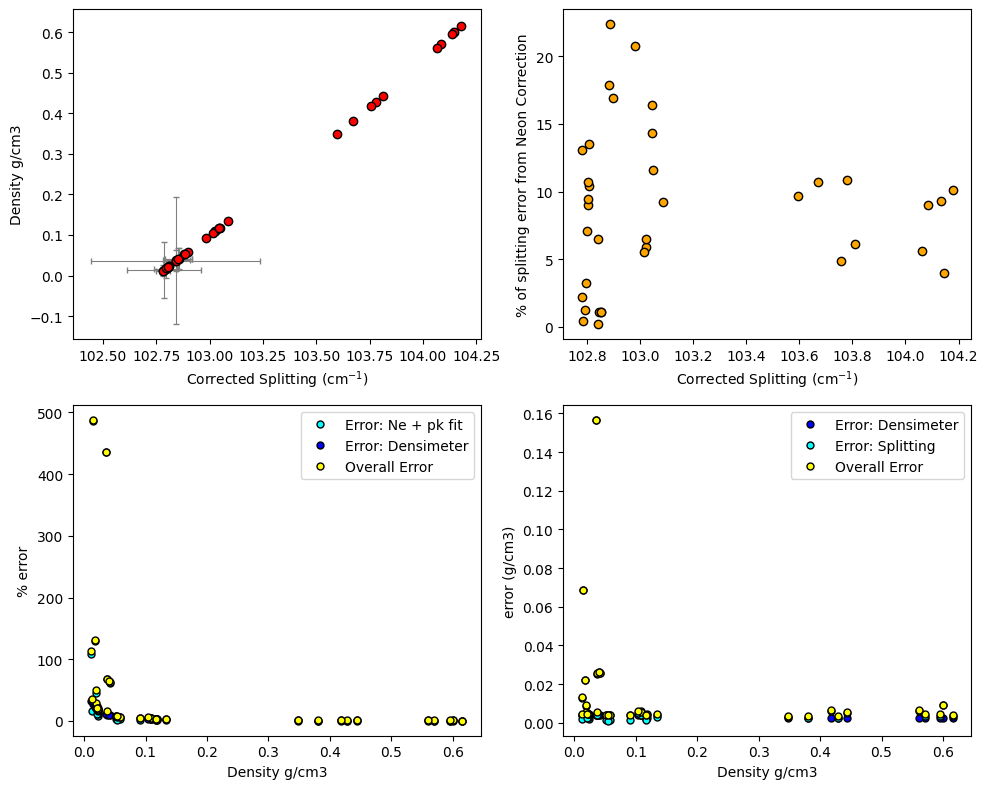

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

In [17]:
df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-201-MIA-rep1,0.020852,0.004924,0.002987,0.003914,102.802880,0.007537,0.000742,0.007516,11.965,...,47476.0,NaN,NaN,NaN,NaN,NaN,47476.0,0.997928,0.997921,0.997935
1,187-9-201-MIA-rep2,0.019276,0.005502,0.003861,0.003920,102.798902,0.009745,0.000740,0.009737,11.970,...,47731.0,NaN,NaN,NaN,NaN,NaN,47731.0,0.997928,0.997921,0.997935
2,187-9-201-MIA-rep3,0.036787,0.005717,0.004210,0.003867,102.843094,0.010626,0.000738,0.010622,11.984,...,48065.0,NaN,NaN,NaN,NaN,NaN,48065.0,0.997928,0.997921,0.997935
5,187-9-202-MIC-rep3,0.037438,0.025610,0.025316,0.003865,102.844738,0.063891,0.000728,0.064020,12.005,...,49609.0,NaN,NaN,NaN,NaN,NaN,49609.0,0.997928,0.997921,0.997935
7,187-9-202-MIB-rep2,0.011932,0.013456,0.012864,0.003946,102.780369,0.032466,0.000724,0.032525,12.006,...,50191.0,1095.363607,766.947887,56.059011,Spline,6.251010,50191.0,0.997928,0.997921,0.997935
8,187-9-202-MIB-rep3,0.014069,0.068534,0.068421,0.003938,102.785762,0.172675,0.000723,0.173032,12.015,...,50497.0,1095.413038,817.999397,54.264402,Spline,6.614527,50497.0,0.997928,0.997921,0.997935
9,187-9-202-MID-rep1,0.017050,0.022346,0.021998,0.003927,102.793284,0.055517,0.000722,0.055628,12.015,...,50797.0,NaN,NaN,NaN,NaN,NaN,50797.0,0.997928,0.997921,0.997935
10,187-9-202-MID-rep2,0.035921,0.156406,0.156358,0.003869,102.840911,0.394604,0.000721,0.395423,12.016,...,51068.0,NaN,NaN,NaN,NaN,NaN,51068.0,0.997928,0.997921,0.997934
11,187-9-202-MID-rep3,0.041538,0.025918,0.025630,0.003855,102.855086,0.064682,0.000719,0.064813,12.013,...,51366.0,NaN,NaN,NaN,NaN,NaN,51366.0,0.997927,0.997920,0.997934
12,187-9-213-MIA-rep1,0.108597,0.005910,0.004516,0.003812,103.024325,0.011398,0.000716,0.011399,6.006,...,52547.0,NaN,NaN,NaN,NaN,NaN,52547.0,0.997927,0.997920,0.997934


In [18]:

df[df['filename'].str.contains("MI")]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-9-201-MIA-rep1,0.020852,0.004924,0.002987,0.003914,102.802880,0.007537,0.000742,0.007516,11.965,...,47476.0,NaN,NaN,NaN,NaN,NaN,47476.0,0.997928,0.997921,0.997935
1,187-9-201-MIA-rep2,0.019276,0.005502,0.003861,0.003920,102.798902,0.009745,0.000740,0.009737,11.970,...,47731.0,NaN,NaN,NaN,NaN,NaN,47731.0,0.997928,0.997921,0.997935
2,187-9-201-MIA-rep3,0.036787,0.005717,0.004210,0.003867,102.843094,0.010626,0.000738,0.010622,11.984,...,48065.0,NaN,NaN,NaN,NaN,NaN,48065.0,0.997928,0.997921,0.997935
5,187-9-202-MIC-rep3,0.037438,0.025610,0.025316,0.003865,102.844738,0.063891,0.000728,0.064020,12.005,...,49609.0,NaN,NaN,NaN,NaN,NaN,49609.0,0.997928,0.997921,0.997935
7,187-9-202-MIB-rep2,0.011932,0.013456,0.012864,0.003946,102.780369,0.032466,0.000724,0.032525,12.006,...,50191.0,1095.363607,766.947887,56.059011,Spline,6.251010,50191.0,0.997928,0.997921,0.997935
8,187-9-202-MIB-rep3,0.014069,0.068534,0.068421,0.003938,102.785762,0.172675,0.000723,0.173032,12.015,...,50497.0,1095.413038,817.999397,54.264402,Spline,6.614527,50497.0,0.997928,0.997921,0.997935
9,187-9-202-MID-rep1,0.017050,0.022346,0.021998,0.003927,102.793284,0.055517,0.000722,0.055628,12.015,...,50797.0,NaN,NaN,NaN,NaN,NaN,50797.0,0.997928,0.997921,0.997935
10,187-9-202-MID-rep2,0.035921,0.156406,0.156358,0.003869,102.840911,0.394604,0.000721,0.395423,12.016,...,51068.0,NaN,NaN,NaN,NaN,NaN,51068.0,0.997928,0.997921,0.997934
11,187-9-202-MID-rep3,0.041538,0.025918,0.025630,0.003855,102.855086,0.064682,0.000719,0.064813,12.013,...,51366.0,NaN,NaN,NaN,NaN,NaN,51366.0,0.997927,0.997920,0.997934
12,187-9-213-MIA-rep1,0.108597,0.005910,0.004516,0.003812,103.024325,0.011398,0.000716,0.011399,6.006,...,52547.0,NaN,NaN,NaN,NaN,NaN,52547.0,0.997927,0.997920,0.997934


## lets look at standards


Text(0, 0.5, 'Density g/cm3')

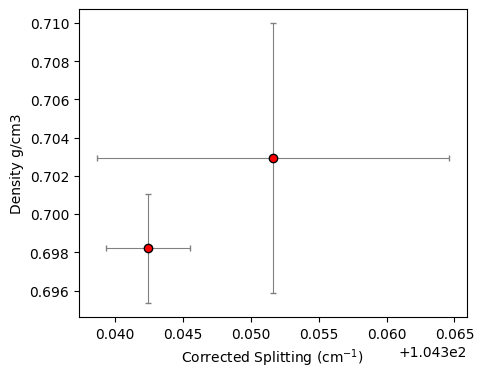

In [19]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [20]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

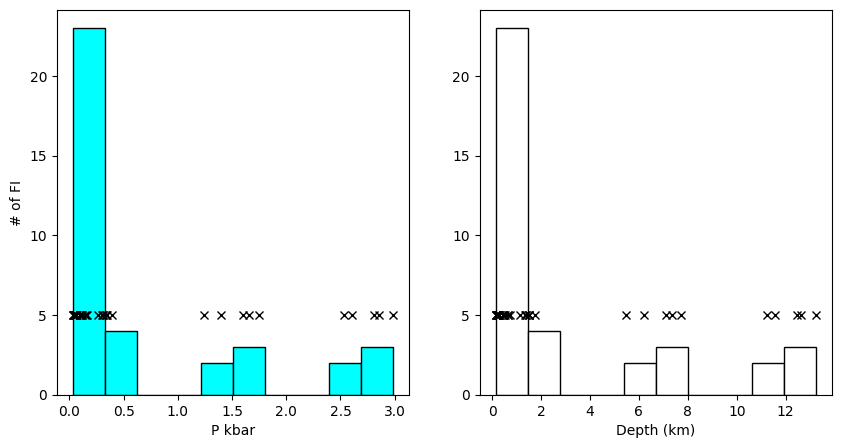

In [21]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')